In [3]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Poço Sintético </span>

</div>

<div style="width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div>
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fernandovizeu@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>

# Agradecimentos a:
 **Fábio Júnior Damasceno Fernandes - GIECAR/UFF** (Pseudo poços na Bacia de Campos e Campo de Jubarte - Apresentação)

# Referências:

[GIECAR - Modelagem Sísmica de Propriedades de Rocha](https://www.youtube.com/watch?v=p2EAf3H4Ec0&list=PL-QDjrxb17QNBRUUR3_xU1XI28Ts8QGlK)

DVORKIN, J.; GUTIERREZ, M. A.; GRANA, D. **Seismic reflections of rock properties**. Cambridge University Press, 2014.


In [4]:
!mkdir -p dados
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD' -O dados/dp1.las
!pip install lasio
!pip install gstools

--2020-09-09 23:33:56--  https://docs.google.com/uc?export=download&id=1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD
Resolving docs.google.com (docs.google.com)... 108.177.127.101, 108.177.127.113, 108.177.127.139, ...
Connecting to docs.google.com (docs.google.com)|108.177.127.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77auoc6f0mtn9eebbn4qlv48v53o3t25/1599694425000/08383065786090340556/*/1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD?e=download [following]
--2020-09-09 23:33:57--  https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77auoc6f0mtn9eebbn4qlv48v53o3t25/1599694425000/08383065786090340556/*/1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD?e=download
Resolving doc-0g-bs-docs.googleusercontent.com (doc-0g-bs-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-0g-bs-docs.googleusercontent.com (doc-0g-

## Importando dados

Para importar os arquivos

In [5]:
import lasio
import numpy as np
import matplotlib.pyplot as plt
import gstools as gs

import sys
sys.path.insert(0, 'funcoes')

In [6]:
DP1 = lasio.read('dados/dp1.las')
print("perfis", DP1.keys() )

perfis ['DEPT', 'SP', 'ILD', 'ILM', 'LL8', 'GR', 'CALI', 'DRHO', 'RHOB', 'NPHI', 'DT']


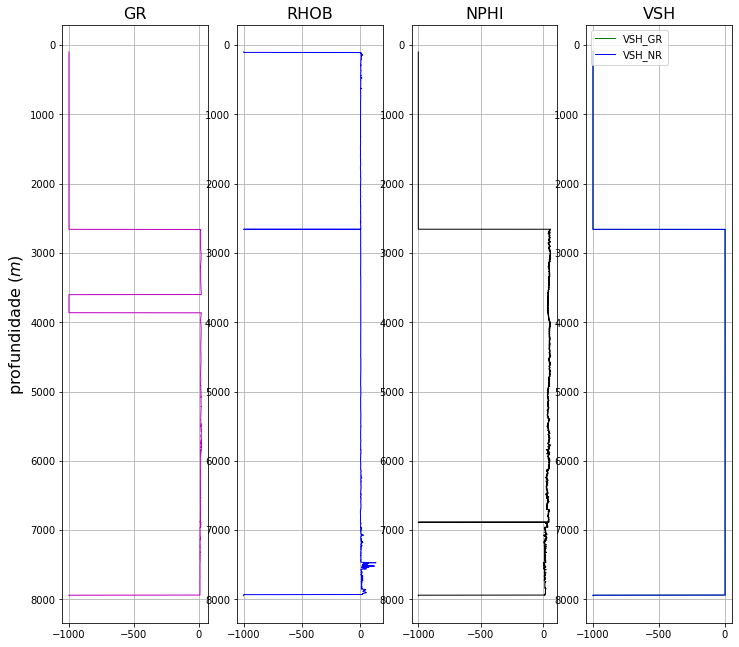

In [7]:
### Graficos

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4) # 4 cruvas = 4 subplots
fig.set_size_inches(12, 11) # tamanho da figura | polegadas

#['DEPT', 'SP', 'ILD', 'ILM', 'LL8', 'GR', 'CALI', 'DRHO', 'RHOB', 'NPHI', 'DT']
#_____________________________________________________#

ax1.plot(DP1['CALI'],DP1['DEPT'],'-m',linewidth = 1,label='GR')
# (eixo x, eixo y, cor e tipo, comprimento da curva, legenda )
ax1.invert_yaxis()
# inverte o eixo y
ax1.grid()
# adiciona o 'grid' ou malha de fundo
ax1.set_ylabel('profundidade ($m$)', fontsize=16)
# o que vai ser escrito no eixo y
ax1.set_title('GR', fontsize=16)
# titulo do 'track' ou do grafico com tamanho de letra 16

#_____________________________________________________#

ax2.plot(DP1['ILM'],DP1['DEPT'],'-b',linewidth = 1,label='RHOB')
ax2.invert_yaxis()
ax2.grid()
ax2.set_title('RHOB', fontsize=16)

#_____________________________________________________#

ax3.plot(DP1['NPHI'],DP1['DEPT'],'-k',linewidth = 1,label='NPHI')
ax3.invert_yaxis()
ax3.grid()
ax3.set_title('NPHI', fontsize=16)

#_____________________________________________________#

ax4.plot(DP1['RHOB'],DP1['DEPT'],'-g',linewidth = 1,label='VSH_GR')
ax4.plot(DP1['DRHO'],DP1['DEPT'],'-b',linewidth = 1,label='VSH_NR')
ax4.invert_yaxis()
ax4.grid()
ax4.set_title('VSH', fontsize=16)
ax4.legend(loc=2) # "loc=2" adiciona a posicao da legenda, teste estes valores

plt.show()

# Uma forma mais prática de visualizar com os dados ...

aqui  profundidade
aqui  5
aqui  4
aqui  2
aqui  3
aqui  0
aqui  1


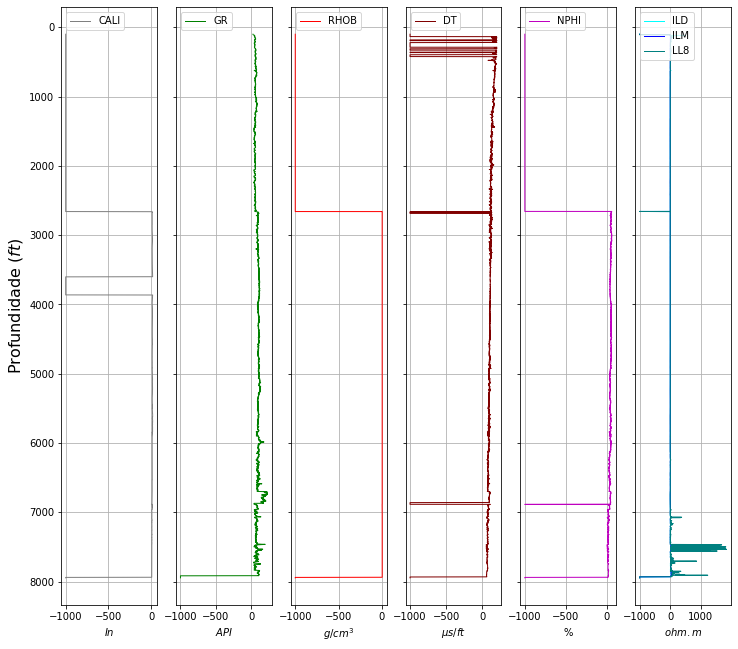

In [8]:
def grafico_automatico(dicionario, dados, tamanho = [12,11]):

    chaves = []
    for i in dicionario:
        if i != 'profundidade':
            chaves.append(i)

    n_tracks = np.max(chaves) + 1

    profundidade_dado = dados[dicionario['profundidade']['perfil']]
    profundidade_descricao = dicionario['profundidade']['descricao']

    # n_tracks = número máximo encontrado nas chaves do dicionário

    fig, ax = plt.subplots(1,n_tracks)
    # similar a "fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)", onde o elemento ax receberá todos os valores
    # logo, ax1 = ax[0], ax2 = ax[1], e assim por diante

    fig.set_size_inches(tamanho) # tamanho da figura | polegadas

    ax[0].set_ylabel( profundidade_descricao , fontsize=16)  # label y para a profundidade aplicada apenas no primeiro track
    for i in dicionario: # loop
        if i != 'profundidade':
            for j in range(len(dicionario[i]['perfis'])): # pode ter mais de um perfil em cada track, estes são gerenciados pelo índice "j"
                ax[i].plot(dados[dicionario[i]['perfis'][j]], # "i" são as demais curvas distintas de zero "if i != 0:"
                             profundidade_dado,
                             dicionario[i]['estilo'][j], # estilo de linha, pode ser "." ou "-", "--"
                             color = dicionario[i]['cores'][j], # a cor da linha que você quer
                             linewidth = 1, # o comprimento da linha é fixo em 1, mas você pode alterar se quiser
                             label=dicionario[i]['perfis'][j]) # 
                
            if i > 0:
                ax[i].set_yticklabels([]) # faz com que o valor da profundidade não aparece nos tracks além de "ax[0]""

            ax[i].invert_yaxis()
            ax[i].grid()
            ax[i].legend(loc=2)
            ax[i].set_xlabel(dicionario[i]['unidade']) # adiciona a unidade do perfil

# ---------------------------------------------------------------------------- #

meu_grafico = {
    'profundidade':{'perfil':'DEPT','descricao':'Profundidade ($ft$)'},
    5:{'perfis':['ILD','ILM','LL8'],'cores':['cyan','blue','teal'],'estilo':['-','-','-'],'unidade': '$ohm.m$'},
    4:{'perfis':['NPHI'],'cores':['m'],'estilo':['-'],'unidade':'$ \% $'},
    2:{'perfis':['RHOB'],'cores':['r'],'estilo':['-'],'unidade':'$g / cm^3$'},
    3:{'perfis':['DT'],'cores':['maroon'],'estilo':['-'],'unidade':'$ \mu s / ft$'},
    0:{'perfis':['CALI'],'cores':['grey'],'estilo':['-'],'unidade':'$In$'},
    1:{'perfis':['GR'],'cores':['g'],'estilo':['-'],'unidade':'$API$'},
}

grafico_automatico(meu_grafico, DP1)
# neste exemplo as chaves do dicionário "meu_grafico" são 0,6,5,3,4,1,2 logo a variável "n_tracks" vai ser igual ao valor máximo, ou seja, 6.
# a variável ax[0] é o perfil CALI, ax[1] é o perfil "GR", etc...
# quer ver o que faz o termo "for i in dicionario:"? 

for i in meu_grafico:
    print("aqui ",i)

# Cortando os dados no intervalo desejado

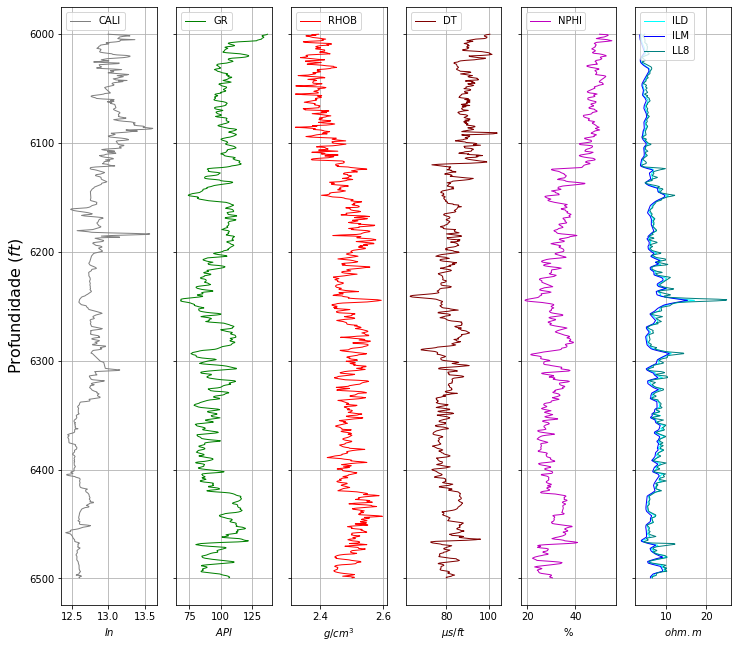

In [9]:
def cropar_dados(dados, mnemonico_profundidade, profundidades):
    """
    Considerando a variável "dados" na forma de dicionário, esta função retorna o dado somente no intervalo de profundidade desejado
    """
    dado_cropado = {}
    w = (dados[mnemonico_profundidade] >= profundidades[0]) & (dados[mnemonico_profundidade] < profundidades[1])

    for i in dados.keys():
        dado_cropado[i] = dados[i][w]

    return dado_cropado

DP1_cropado = cropar_dados(DP1,'DEPT',(6000,6500)) # 4000 a 7000

# ---------------------------------------------------------------------------- #

grafico_automatico(meu_grafico, DP1_cropado)

# Trabalhando com as Relações Espaciais

No exemplo abaixo nós tentamos verificar a relação espacial de um perfil de poço. Claramente que o resultado foi bem ruim, e essencialmente não apresenta nenhum resultado. Um melhor entendimento deste processo será melhor explicado adiante.

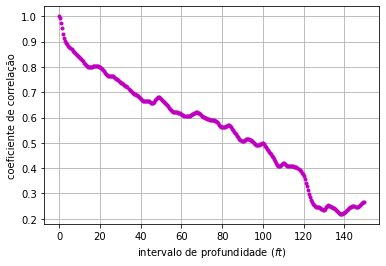

In [10]:
# suavização com a profundidade

passos = 300

coeficientes_correlação = []
intervalo_profundidade = []

for passo in range(passos): # 'passo' vai de 0 a 300

    # ------------------------------------------ #

    valor_h = [] # h  de head ou cabeça
    valor_t = [] # t de tail ou cauda

    for i in range(len(DP1_cropado['NPHI'])-passo): # range menor que o passo para evitar o acesso em indices mais altos e não existentes
        valor_t.append(DP1_cropado['NPHI'][i+passo])
        valor_h.append(DP1_cropado['NPHI'][i])

    coeficientes_correlação.append(np.corrcoef(valor_h,valor_t)[1][0])
    intervalo_profundidade.append(DP1_cropado['DEPT'][0+passo] - DP1_cropado['DEPT'][0])

    # ------------------------------------------ #

plt.plot(intervalo_profundidade,coeficientes_correlação,'m.')
plt.xlabel('intervalo de profundidade ($ft$)')
plt.ylabel('coeficiente de correlação')
plt.grid()
plt.show()

# Criando a Janela móvel  

A janela móvel serve para suavizar o dado de poço, e tentar simular o dado menos ruidoso possível.

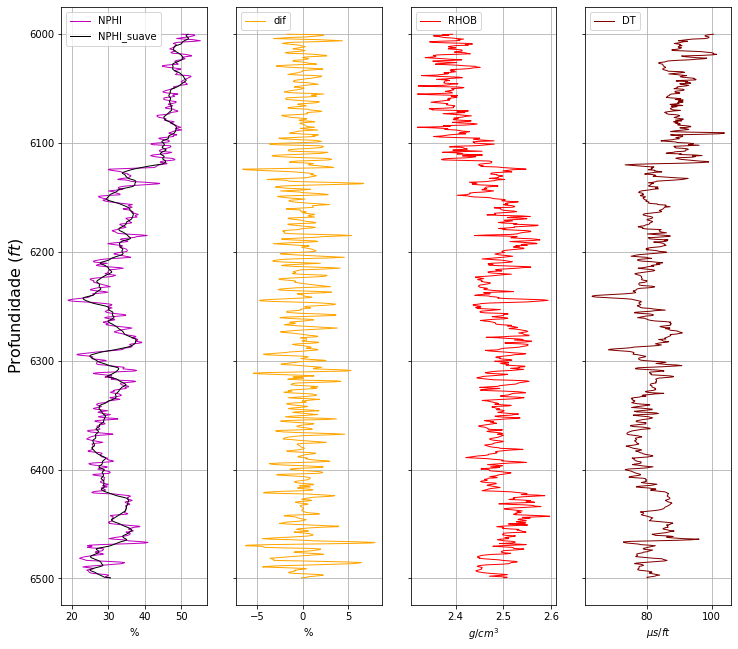

In [11]:
# Janela Movel 1D - criando o dado de janela móvel + a diferença (ruído)

def media_movel(curva,intervalo=100):
    d = list(curva)
    n = len(curva)

    intervalo = round(intervalo/2.0)

    JM = np.zeros(n)
    for j in range(n):
        md = []
        for i in range(j-intervalo,j+intervalo):
            if i < 0:
                i = j-i
            if i >= n-1:
                i = j-i
            md.append(d[i])
        JM[j] = np.mean(md)
    return JM

nphi_suave = media_movel(DP1_cropado['NPHI'],intervalo=15)

DP1_cropado['NPHI_suave'] = np.array(nphi_suave)

DP1_cropado['dif'] = DP1_cropado['NPHI'] - DP1_cropado['NPHI_suave']

# ---------------------------------------------------------------------------- #

meu_grafico_2 = {
    'profundidade':{'perfil':'DEPT','descricao':'Profundidade ($ft$)'},
    0:{'perfis':['NPHI','NPHI_suave'],'cores':['m','k'],'estilo':['-','-'],'unidade':'$ \% $'},
    1:{'perfis':['dif'],'cores':['orange'],'estilo':['-'],'unidade':'$ \% $'},
    2:{'perfis':['RHOB'],'cores':['r'],'estilo':['-'],'unidade':'$g / cm^3$'},
    3:{'perfis':['DT'],'cores':['maroon'],'estilo':['-'],'unidade':'$ \mu s / ft$'},
}

grafico_automatico(meu_grafico_2, DP1_cropado)

# Relação Espacial

A relação espacial é um tipo de análise que tenta identificar o quão influente é a profundidade na distribuição dos dados. Aqui a primeira análise será feita com o coeficiente de correlação e posteriormente com o variograma (mais usual). O coeficiente de correlação indica a similaridade entre duas curvas. Se as curvas são similares, mais próximo de 1 é o valor.

Intuitivamente sabemos que duas amostras próximas tendem a ser similares, e duas amostras distantes tendem a ser distintas, mas aonde está o limite da similaridade? Existe um limite? Um valor? A análise da relação espacial nos ajuda a responder essas perguntas.

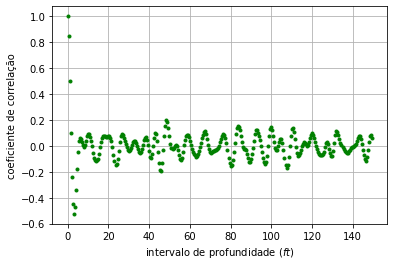

In [12]:
# suavização com a profundidade

passos = 300

coeficientes_correlação = []
intervalo_profundidade = []

for passo in range(passos): # 'passo' vai de 0 a 300

    # ------------------------------------------ #

    valor_h = [] # h  de head ou cabeça
    valor_t = [] # t de tail ou cauda

    for i in range(len(DP1_cropado['dif'])-passo): # range menor que o passo para evitar o acesso em indices mais altos e não existentes
        valor_t.append(DP1_cropado['dif'][i+passo])
        valor_h.append(DP1_cropado['dif'][i])

    coeficientes_correlação.append(np.corrcoef(valor_h,valor_t)[1][0])
    intervalo_profundidade.append(DP1_cropado['DEPT'][0+passo] - DP1_cropado['DEPT'][0])

    # ------------------------------------------ #

plt.plot(intervalo_profundidade,coeficientes_correlação,'g.')
plt.xlabel('intervalo de profundidade ($ft$)')
plt.ylabel('coeficiente de correlação')
plt.grid()
plt.show()

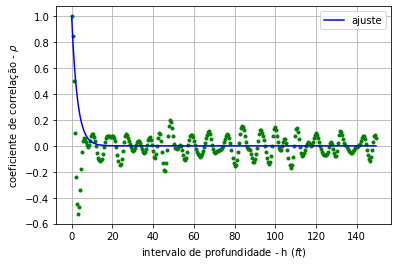

In [13]:
def funcao_ajuste(x,a):

    return a**x

ajuste = []
for i in intervalo_profundidade:
    ajuste.append(funcao_ajuste(i,0.7))

plt.plot(intervalo_profundidade,coeficientes_correlação,'g.')
plt.plot(intervalo_profundidade,ajuste,'b-',label='ajuste')
plt.xlabel('intervalo de profundidade - h ($ft$)')
plt.ylabel('coeficiente de correlação - $\\rho$')
plt.legend()
plt.grid()
plt.show()

No exemplo acima, a similaridade entre as amostras termina por volta de 7 a 10 pés (ft). Observe como a partir deste intervalo o coeficiente de correlação oscila em torno de zero. Abaixo é feita outra análise, através do variograma, as conclusões são similares, mas o varigorama permite aplicações subsequentes para outros métodos, como por exemplo a krigagem.

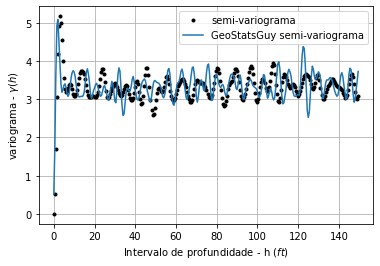

In [14]:
# variograma

gama = []
for j in range(passos):

    # ------------------------------------------ #

    passo = j

    valor_gama = []
    for i in range(len(DP1_cropado['dif'])-passo):
        valor_gama.append( ((DP1_cropado['dif'][i+passo] - DP1_cropado['dif'][i])**2) )

    gama.append(sum(valor_gama)/(2*len(valor_gama)))

    # ------------------------------------------ #

bin_center, gama_GeoStatsGuy = gs.vario_estimate_unstructured((DP1_cropado['DEPT'], DP1_cropado['DEPT']), DP1_cropado['dif'], np.arange(passos + 1))

plt.plot(intervalo_profundidade,gama,'k.',label="semi-variograma")
plt.plot(intervalo_profundidade, gama_GeoStatsGuy,label="GeoStatsGuy semi-variograma")
plt.xlabel('Intervalo de profundidade - h ($ft$)')
plt.ylabel('variograma - $\gamma (h)$')
plt.legend()
plt.grid()
plt.show()

O dado na originalmente tem a distribuição como apresentada acima, mas esta distribuição pode ser aproximada por um modelo de variograma. Abaixo utilizamos a sugestão de Isaacs e Srivastava (1989) em vermelho e Dvorkin e colaboradores 2014 em azul.

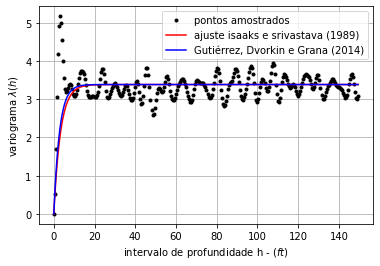

In [15]:
# ajuste variograma

def gama_ajuste_is(x,a,C1,C0): # ordinario - isaaks e srivastava (1989)
    """
    x = intervalo de profundidade
    a = range
    C0 = nugget
    C1 = sill
    """

    if x == 0:
        return 0
    else:
        expo = np.exp( (-3.0*abs(x))/a )
        res = C0 + (C1*(1 - expo))
        return res

def gama_ajuste_gdg(x,s): # Gutiérrez, Dvorkin e Grana (2014)

    return s*(1 - funcao_ajuste(x,0.7))

# ------------------------------ #

VARIANCIA = np.var(DP1_cropado['dif'])

vario_ajuste_is = []
vario_ajuste_gdg = []
for i in intervalo_profundidade:
    vario_ajuste_is.append(gama_ajuste_is(i,a=10,C1=VARIANCIA,C0=0))
    vario_ajuste_gdg.append(gama_ajuste_gdg(i,VARIANCIA))

plt.plot(intervalo_profundidade,gama,'k.',label='pontos amostrados')
plt.plot(intervalo_profundidade,vario_ajuste_is,'r-',label='ajuste isaaks e srivastava (1989)')
plt.plot(intervalo_profundidade,vario_ajuste_gdg,'b-',label='Gutiérrez, Dvorkin e Grana (2014)')
plt.xlabel('intervalo de profundidade h - ($ft$)')
plt.ylabel('variograma $\lambda (h)$')
plt.legend()
plt.grid()
plt.show()

## O cálculo do perfil sintético é feito pela Operação entre as matrizes/vetores:

$ \overline{V} = \overline{m} + \overline{\overline{R}}\overline{u}$

## Onde: 

$\overline{m}$ é o perfil suavizado <br>

$\overline{u}$ é um vetor aleatório com valor esperado 0 e desvio padrão 1

$ \overline{\overline{R}}$ é a matriz de covariância $\overline{\overline{C}}$ após a decomposição de Cholesky, ou seja $ \overline{\overline{R}} = chol( \overline{\overline{C}} )$ 

Essa parte final foi feita também para os dois modelos de cálculo de covariância, o primeiro por Dvorkin e colaboradores 2014 e o segundo por Isaacs e Srivastava (1989). Também Acrescentamos uma solução utilizando a matriz triangular nos casos onde a decomposição de Cholesky resulta em erro.

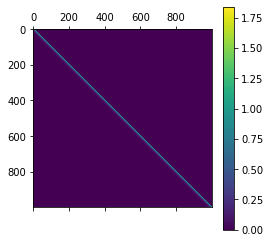

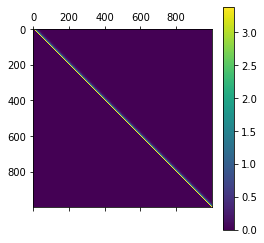

In [16]:
def _C(x,a,C1,C0):

    if x == 0:
        return C0 + C1
    else:
        return C1*np.exp( (-3*abs(x))/a )

# ------------------------------ #

C = []
for j in DP1_cropado['DEPT']:
    c0 = []
    for i in DP1_cropado['DEPT']:
        #c0.append(gama_ajuste_gdg(j-i,VARIANCIA)) # Gutiérrez, Dvorkin e Grana (2014)
        c0.append(_C(j-i,a=10.0,C1=VARIANCIA,C0=0)) # Isaaks e Srivastava (1989)
    C.append(c0)

C = np.array(C)

R = np.linalg.cholesky(C)

R_b = np.triu(C)#/2 # Alternativa (divida tudo para suavizar)

plt.matshow(R)
plt.colorbar()
plt.show()

plt.matshow(R_b)
plt.colorbar()
plt.show()

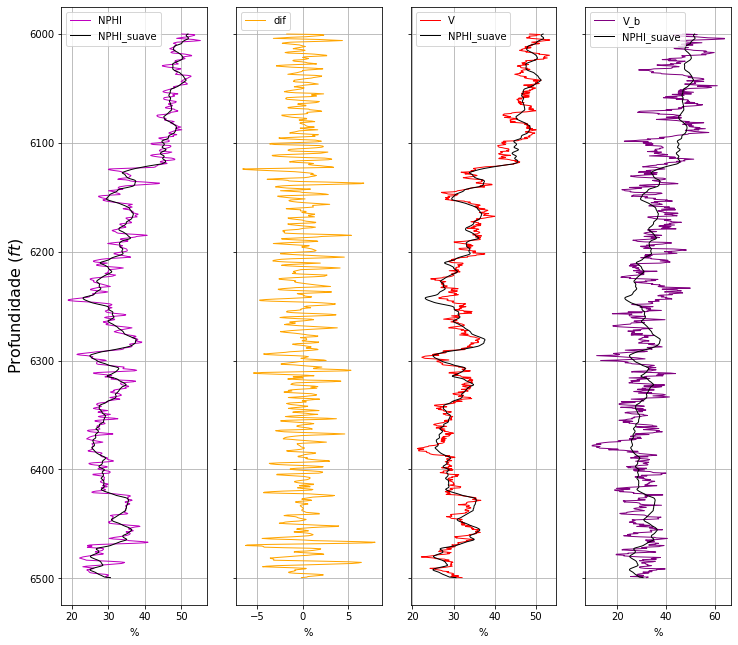

In [17]:
u = np.random.normal(0.0,1.0,len(DP1_cropado['DEPT']))

Ru = np.dot(R,u)

DP1_cropado["V"] = np.array(DP1_cropado['NPHI_suave']) + Ru

# Alternativa ... 

Ru_b = np.dot(R_b,u)
DP1_cropado["V_b"] = np.array(DP1_cropado['NPHI_suave']) + Ru_b

# ---------------------------------------------------------------------------- #

meu_grafico_3 = {
    'profundidade':{'perfil':'DEPT','descricao':'Profundidade ($ft$)'},
    0:{'perfis':['NPHI','NPHI_suave'],'cores':['m','k'],'estilo':['-','-'],'unidade':'$ \% $'},
    1:{'perfis':['dif'],'cores':['orange'],'estilo':['-'],'unidade':'$ \% $'},
    2:{'perfis':['V','NPHI_suave'],'cores':['r','k'],'estilo':['-','-'],'unidade':'$ \% $'},
    3:{'perfis':['V_b','NPHI_suave'],'cores':['purple','k'],'estilo':['-','-'],'unidade':'$ \% $'},
}

grafico_automatico(meu_grafico_3, DP1_cropado)